In [247]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from math import sqrt

In [31]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [188]:
def lookupprice(yr):
    price = 0
    price = avg_tic_price_df.loc[avg_tic_price_df.year == yr]['price'].item()
    return price 

In [4]:
# residual (error) function
def residual(vars, t, sales):
    M = vars[0]
    P = vars[1]
    Q = vars[2]
    Bass = M * (((P+Q)**2/P)*np.exp(-(P+Q)*t))/(1+(Q/P)*np.exp(-(P+Q)*t))**2 
    return (Bass - (sales))

[ 1.03035319e+08  7.95669005e-01 -1.18771750e+00]


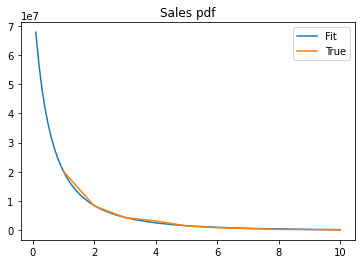

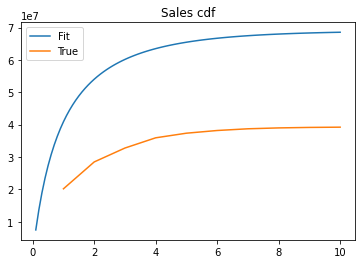

In [239]:
#time intervals
t= np.linspace(1.0, 10.0, num=10)
# sales vector
#sales=np.array([840,1470,2110,4000, 7590, 10950, 10530, 9470, 7790, 5890])
#sales=np.array([3540027,1655686,1038334,604276, 261796, 86075, 47251, 27178, 12546, 11166])
sales=np.array([20172353.738910012,
 8302272.750316857,
 4298112.420785805,
 3160234.727503169,
 1425858.3016476554,
 833573.257287706,
 528414.7021546261,
 272141.19138149556,
 150833.46007604562,
 77605.95690747783,])
# cumulatice sales
c_sales=np.cumsum(sales)
# initial variables(M, P & Q)
vars = [1000000, 0.03,0.38]
#vars = [30633, 0.047,0.22]
#vars = [1000000, 0.03,0.5]
# non linear least square fitting
varfinal,success = leastsq(func=residual, x0=vars, args=(t, sales))

# estimated coefficients
m = varfinal[0]
p = varfinal[1]
q = varfinal[2]

print(varfinal)
#sales plot (pdf)
#time interpolation
tp=(np.linspace(1.0, 100.0, num=100))/10
cofactor= np.exp(-(p+q) * tp)
sales_pdf= m* (((p+q)**2/p)*cofactor)/(1+(q/p)*cofactor)**2
plt.plot(tp, sales_pdf,t,sales)
plt.title('Sales pdf')
plt.legend(['Fit', 'True'])
plt.show()


# Cumulative sales (cdf)
sales_cdf= m*(1-cofactor)/(1+(q/p)*cofactor)
plt.plot(tp, sales_cdf,t,c_sales)
plt.title('Sales cdf')
plt.legend(['Fit', 'True'])
plt.show()


109072762.0

In [27]:
report_df = pd.read_csv('./data/weekly_bo_nums_tidy.csv', encoding='utf-8',index_col=0)

In [37]:
colstoclean = ['wkgross', 'cumtot_gross']
for col in colstoclean:
    report_df[col] = report_df[col].apply(clean_currency).astype('float')

In [47]:
report_df

,weekdate,prevwkrank,nums_title,distr,wkgross,pct_chg_lw,num_thtrs,num_thtrs_chg,perthtr,cumtot_gross,wk_in run
52150,2019/08/30,N,Ága,Big World Pictures,978.0,,1,,$978,978.0,1
52228,2019/09/06,(83),Ága,Big World Pictures,3618.0,+270%,1,n/c,"$3,618",4596.0,2
52327,2019/09/13,(70),Ága,Big World Pictures,3829.0,+6%,1,n/c,"$3,829",8425.0,3
52449,2019/09/20,(83),Ága,Big World Pictures,378.0,-90%,1,n/c,$378,8803.0,4
52531,2019/09/27,(100),Ága,Big World Pictures,3765.0,+896%,2,+1,"$1,883",12568.0,5
...,...,...,...,...,...,...,...,...,...,...,...
10885,2011/09/23,(-),"!Women, Art, Revolution",Zeitgeist,2075.0,,2,,"$1,038",48888.0,18
11006,2011/09/30,(113),"!Women, Art, Revolution",Zeitgeist,2001.0,-4%,1,-1,"$2,001",50889.0,19
11144,2011/10/07,(108),"!Women, Art, Revolution",Zeitgeist,419.0,-79%,1,n/c,$419,51300.0,20
11269,2011/10/14,(123),"!Women, Art, Revolution",Zeitgeist,598.0,+43%,1,n/c,$598,51906.0,21


In [590]:
groupby_title = report_tidy_df.groupby(by='nums_title',sort=False)

In [591]:
count_freq = dict(report_tidy_df['nums_title'].value_counts())
report_tidy_df['count_freq'] = report_tidy_df['nums_title']
report_tidy_df['count_freq'] = report_tidy_df['count_freq'].map(count_freq)

<ipython-input-591-0964f8d6ed6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_tidy_df['count_freq'] = report_tidy_df['nums_title']
<ipython-input-591-0964f8d6ed6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_tidy_df['count_freq'] = report_tidy_df['count_freq'].map(count_freq)


In [348]:
wk_gross_dt = groupby_title['wkticsold'].apply(list).to_dict()
wk_cum_dt = groupby_title['wkticsold_cum'].apply(list).to_dict()
wk_cum2_dt = groupby_title['wkticsold_cum'].apply(list).to_dict()

In [623]:
def bass_model(X,sales):
    t= np.linspace(1.0, 10.0, num=10)
    #print(sales)
    #print(X)

    #initial vars for M P Q
    vars = [100000, 0.03,0.15]
    # non linear least square fitting
    #varfinal,success = leastsq(residual, vars, args=(t, sales))
    
    linearRegression = linear_model.LinearRegression()
    linearRegression.fit(X, sales)
    
    # estimated coefficients
    A = linearRegression.intercept_
    B = linearRegression.coef_[0]
    C = linearRegression.coef_[1]

    print(A,B,C)
    
    fac= (4*A*C)
    b2fac = B**2 - fac
    if B**2 < fac:
        print('roots are complex')
        return(A,B,C)
    
    print('B',B,'b2fac',b2fac)
    negnum= -B - sqrt(b2fac)
    
    denom = (2*C)
    
    m = negnum/denom

    p = A/m
    #q2 = b1 + (b0/m)
    q = B+p
    return (m, p, q)

In [553]:
#for each key in dict get list and input into Bass model
#returns M, P, Q save into new dataframe 
#M, P, Q = ''
aga_df=report_df[report_df.nums_title == 'Parasite']
(M, P, Q) = bass_model(aga_df[['wkticsold_cum', 'wkticsold_cum2']].values, aga_df['wkticsold'].values)
print('M', M,'p', P,'q', Q)

195337.40635630515 0.03255454963577572 -1.359425618889836e-09
M 28916463.430634066 p 0.006755231559519306 q 0.039309781195295025


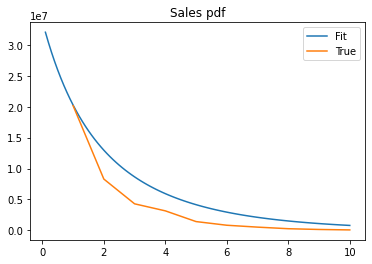

In [535]:
#sales plot (pdf)
#time interpolation
tp=(np.linspace(1.0, 100.0, num=100))/10
cofactor= np.exp(-(P+Q) * tp)
sales_pdf= M* (((P+Q)**2/P)*cofactor)/(1+(Q/P)*cofactor)**2
plt.plot(tp, sales_pdf,t,sales)
plt.title('Sales pdf')
plt.legend(['Fit', 'True'])
plt.show()

In [594]:
wk_gross_df[0:1]

,nums_title,wkticsold,wkticsold_cum,wkticsold_cum2,year
0,Ága,"[106.76855895196506, 394.9781659388646, 418.01...","[0.0, 106.76855895196508, 501.74672489082974, ...","[0.0, 11399.525180679242, 251749.775938674, 84...",2019


In [592]:
wk_gross_df = groupby_title.agg({'wkticsold':list,
                   'wkticsold_cum':list,
                   'wkticsold_cum2':list,'year':min})

In [593]:
wk_gross_df = wk_gross_df.reset_index()

In [48]:
avg_tic_price_df=pd.DataFrame(columns=['year','price'])
#https://247wallst.com/3344.2507836761356 0.047360769649544734 0.31538573601636866

In [65]:
report_df['year'] = report_df['weekdate'].astype(str).str[0:4]

In [167]:
avg_tic_price_df.loc[avg_tic_price_df.year == '2020']['price'][1]

9.16

In [161]:
avg_tic_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    26 non-null     object 
 1   price   26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 544.0+ bytes


In [189]:
lookupprice('2010')

7.89

In [190]:
report_df['tic_price'] = report_df.year.apply(lookupprice)

In [194]:
report_df.eval('wkticsold = wkgross / tic_price', inplace = True)

In [508]:
report_df.eval('wkticsold_cum = (cumtot_gross / tic_price)-wkticsold', inplace = True)

In [509]:
report_df.eval('wkticsold_cum2 = wkticsold_cum**2', inplace = True)

In [510]:
report_df[['wkticsold_cum','wkticsold_cum2']].values

array([[0.00000000e+00, 0.00000000e+00],
       [1.06768559e+02, 1.13995252e+04],
       [5.01746725e+02, 2.51749776e+05],
       ...,
       [6.41626734e+03, 4.11684866e+07],
       [6.47011349e+03, 4.18623686e+07],
       [6.54552333e+03, 4.28438757e+07]])

In [587]:
report_df

,weekdate,prevwkrank,nums_title,distr,wkgross,pct_chg_lw,num_thtrs,num_thtrs_chg,perthtr,cumtot_gross,wk_in run,year,tic_price,wkticsold,wkticsold_cum,wkticsold_cum2,count_freq
52150,2019/08/30,N,Ága,Big World Pictures,978.0,,1,,$978,978.0,1,2019,9.16,106.768559,0.000000,0.000000e+00,14
52228,2019/09/06,(83),Ága,Big World Pictures,3618.0,+270%,1,n/c,"$3,618",4596.0,2,2019,9.16,394.978166,106.768559,1.139953e+04,14
52327,2019/09/13,(70),Ága,Big World Pictures,3829.0,+6%,1,n/c,"$3,829",8425.0,3,2019,9.16,418.013100,501.746725,2.517498e+05,14
52449,2019/09/20,(83),Ága,Big World Pictures,378.0,-90%,1,n/c,$378,8803.0,4,2019,9.16,41.266376,919.759825,8.459581e+05,14
52531,2019/09/27,(100),Ága,Big World Pictures,3765.0,+896%,2,+1,"$1,883",12568.0,5,2019,9.16,411.026201,961.026201,9.235714e+05,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10885,2011/09/23,(-),"!Women, Art, Revolution",Zeitgeist,2075.0,,2,,"$1,038",48888.0,18,2011,7.93,261.664565,5903.278689,3.484870e+07,14
11006,2011/09/30,(113),"!Women, Art, Revolution",Zeitgeist,2001.0,-4%,1,-1,"$2,001",50889.0,19,2011,7.93,252.332913,6164.943253,3.800653e+07,14
11144,2011/10/07,(108),"!Women, Art, Revolution",Zeitgeist,419.0,-79%,1,n/c,$419,51300.0,20,2011,7.93,52.837327,6416.267339,4.116849e+07,14
11269,2011/10/14,(123),"!Women, Art, Revolution",Zeitgeist,598.0,+43%,1,n/c,$598,51906.0,21,2011,7.93,75.409836,6470.113493,4.186237e+07,14


In [609]:
bass_model_values_df = pd.DataFrame(columns=['title', 'year', 'M', 'p', 'q'])

In [624]:
tmplist =[]
for movie in report_tidy_df['nums_title'].unique():
    print(movie)
    tmp_df=report_tidy_df[report_tidy_df.nums_title == movie]
    (M, P, Q) = bass_model(tmp_df[['wkticsold_cum', 'wkticsold_cum2']].values, tmp_df['wkticsold'].values)
    tmp_yr = tmp_df.year.values.min()
    tmplist.append([movie,tmp_yr,M,P,Q])

bass_model_values_df = pd.DataFrame(tmplist,columns=['title', 'year', 'M', 'p', 'q'])
print(bass_model_values_df)


Ága
258.49277407730585 0.09422589445482567 -3.8584415348199094e-05
B 0.09422589445482567 b2fac 0.04877368942383979
Zootopia
10757145.567330029 -0.22422646996904086 -1.2564869644983068e-09
B -0.22422646996904086 b2fac 0.10434236255702088
Zookeeper
3787739.867868987 -0.2631999020379842 -1.1568259113118378e-08
B -0.2631999020379842 b2fac 0.24454441341119332
Zombieland: Double Tap
3841756.1208924465 -0.5113856256986681 3.940338649190242e-09
B -0.5113856256986681 b2fac 0.2009639776755555
Zero Dark Thirty
791724.1773992185 0.5511480075486322 -5.380246162717906e-08
B 0.5511480075486322 b2fac 0.47415096492015263
Zama
4524.195730320029 0.05386888703685223 -1.271067551038857e-05
B 0.05386888703685223 b2fac 0.2329241924849224
Yves Saint Laurent
4528.986367033673 0.17566266860643398 -2.062673907328878e-06
B 0.17566266860643398 b2fac 0.06822466116564811
Youth in Revolt
1159542.8824513855 -0.439993527305647 -8.413982529335767e-08
B -0.439993527305647 b2fac 0.583849246269329
Youth
46746.66068098054 0

11464.624983639662 -0.44785601870093217 2.674256526886919e-06
B -0.44785601870093217 b2fac 0.07793762072341291
When Marnie Was There
6919.837514148666 0.429709393851302 -8.150201391051701e-06
B 0.429709393851302 b2fac 0.41024244049871816
What to Expect When Y…
1887908.1826620158 -0.19044957706922108 -3.428516446023026e-08
B -0.19044957706922108 b2fac 0.2951800115193718
What is Democracy
1029.9563553441274 -0.3177214003072755 2.6618679867594156e-05
roots are complex
What Will People Say
2386.543853593928 -1.0840421486137581 0.00013109754355811523
roots are complex
What We Do in the Shadows
20693.382245716544 0.3789079828121751 -1.0540404598912276e-06
B 0.3789079828121751 b2fac 0.2308179079947117
What If...
13960.183452040423 0.012465838344969444 -1.5353826179613118e-06
B 0.012465838344969444 b2fac 0.08589228918889893
Weâre the Millers
2954117.4812773857 0.12443716227405244 -1.5599422201904946e-08
B 0.12443716227405244 b2fac 0.19981471065271472
Western
1361.2048326706506 -0.40238755126

-7277.855210131584 0.021319712377676537 -4.692657170676667e-09
B 0.021319712377676537 b2fac 0.00031792021811097206
Undefeated
7170.943493346115 0.19189813157897606 -4.302446093093732e-06
B 0.19189813157897606 b2fac 0.16023528417047364
Uncut Gems
724395.7299373909 0.7241770452291857 -1.607746805442539e-07
B 0.7241770452291857 b2fac 0.9902903611100966
Uncle Drew
2556826.8837463846 -0.5622539776620261 2.8955392913320843e-09
B -0.5622539776620261 b2fac 0.28651596458468287
Uncle Boonmee
3403.4408005232626 -0.04535731483923703 -4.694531064044398e-06
B -0.04535731483923703 b2fac 0.06596752026019603
Unbroken: Path to Red…
357606.4764480083 -0.3372401483058176 -2.7550368218607965e-07
B -0.3372401483058176 b2fac 0.5078185217693933
Unbroken
3578414.6600085762 0.3983784914133389 -4.914490073705695e-08
B 0.3983784914133389 b2fac 0.8621487554693712
Unbranded
16715.384254221262 -0.8467306612450795 1.2073848126507795e-05
roots are complex
U2 3D
171014.25900692822 -0.2424303198273493 8.572646531566296e

2917.9638215217046 -0.03481834531658413 -1.3867673774098783e-06
B -0.03481834531658413 b2fac 0.017398465315179138
The Zookeeperâs Wife
524785.9042683657 -0.12109221206167918 -7.586833635093717e-08
B -0.12109221206167918 b2fac 0.17392185781104302
The Young Victoria
129565.24740028246 0.23337467635184433 -2.391250501262491e-07
B 0.23337467635184433 b2fac 0.17839292467917772
The Young Karl Marx
4446.154859137847 -0.3217625675255704 3.095460377352587e-07
B -0.3217625675255704 b2fac 0.09802599138143331
The Yes Men Fix the W…
-35945.614180826655 3.3555990605304817 -7.691049927680804e-05
B 3.3555990605304817 b2fac 0.201664521197495
The Wretched
10397.28626061208 0.468488143381874 -2.676668697285456e-06
B 0.468488143381874 b2fac 0.33080150317138135
The Wrecking Crew
13201.254507579539 0.131040298449425 -2.927279404859764e-06
B 0.131040298449425 b2fac 0.1717466015711132
The World's End
1460869.1570196995 -0.32291928685579363 -4.21271476237385e-08
B -0.32291928685579363 b2fac 0.350445868370395

2134.7837874177103 -0.07209027728622319 -1.5743292831745528e-05
B -0.07209027728622319 b2fac 0.13963111327032376
The Third Man
-38393.15609307658 1.078443656682971 -6.277129033971516e-06
B 1.078443656682971 b2fac 0.19904554136913222
The Theory of Everything
284928.5070306508 0.1510971054968502 -5.140179517082622e-08
B 0.1510971054968502 b2fac 0.0814136823164016
The Tenth Man (2016)
2278.1274666339905 -0.5116867465735995 2.9397149377373104e-05
roots are complex
The Tempest
9483.46863712667 0.0951302523825653 -1.1102238982836716e-05
B 0.0951302523825653 b2fac 0.43020070570083896
The Teacher
1798.507216245837 -0.1397096699112481 -1.6635634337728255e-05
B -0.1397096699112481 b2fac 0.1391960254796351
The Tax Collector
46578.9652562763 -0.30214807325741805 -9.468644652144542e-07
B -0.30214807325741805 b2fac 0.2677093262836769
The Tale of the Princ…
12071.414268038909 -0.09021757583695576 -6.442901574410188e-07
B -0.09021757583695576 b2fac 0.03924918458705906
The Switch
1304101.1116381376 -0.

The Queen
1436.2290619776325 -0.5056764210479178 5.304472540070784e-05
roots are complex
The Public
40012.42680654398 -0.9637545249192823 5.227827619507614e-06
B -0.9637545249192823 b2fac 0.09211050437128154
The Pruitt-Igoe Myth
1471.2711693153046 -0.18684643588278693 -1.4762255958952062e-05
B -0.18684643588278693 b2fac 0.1217887169479373
The Private Lives of …
3900.557993128172 0.010774862459119058 -2.1684001135742546e-06
B 0.010774862459119058 b2fac 0.03394797924222131
The Princess of Montp…
5504.966709247568 0.11178594991258932 -5.18678294273152e-06
B 0.11178594991258932 b2fac 0.12670836830918056
The Princess and the …
9318693.00902894 -1.1086795835225076 3.052104445879734e-08
B -1.1086795835225076 b2fac 0.09150544441381592
The Predator
3480538.805228356 -0.5830026418473201 -6.764449306289678e-09
B -0.5830026418473201 b2fac 0.4340677936271196
The Post
766741.2542155078 0.48255744279592305 -6.377457959200841e-08
B 0.48255744279592305 b2fac 0.42845609017151354
The Possession of Han…
9

939.3441181968609 0.16345460252273927 -2.165386346988453e-05
B 0.16345460252273927 b2fac 0.1080791242325623
The Lunchbox
-2503.1988003421266 0.35809744421515455 -6.802061475249559e-07
B 0.35809744421515455 b2fac 0.12142301470354648
The Lucky One
3584494.6596221616 -0.5391013052708832 8.958101031804658e-09
B -0.5391013052708832 b2fac 0.16218915610933166
The Lucky Man
655.2330214922999 -0.40764092148797926 7.906026934516854e-05
roots are complex
The Lovers
11482.639151908745 1.5013634696152416 -6.4722210096373965e-06
B 1.5013634696152416 b2fac 2.551364981355391
The Lovely Bones
547053.0734307177 0.631667310070706 -1.3236090594552867e-07
B 0.631667310070706 b2fac 0.6886373522102638
The Love Witch
4904.797735511784 -0.19583183179843533 2.743833198757191e-07
B -0.19583183179843533 b2fac 0.032966927601576136
The Lost City of Z
171289.04594471064 0.45421509283574474 -6.821452777379046e-07
B 0.45421509283574474 b2fac 0.6736874058374456
The Look of Silence
1864.5536016678993 0.25470346847123865

17742.698365741664 0.8335282100060877 -3.1697691810124336e-06
B 0.8335282100060877 b2fac 0.919730310746863
The Hollars
5881.2965839116505 0.8271152365288589 -7.5287531258239826e-06
B 0.8271152365288589 b2fac 0.8612349346582812
The Hobbit: The Desol…
11786608.322353203 -0.28666573365138887 -2.7652112558137577e-09
B -0.28666573365138887 b2fac 0.21254709085324575
The Hobbit: The Battl…
6469830.031187089 0.5208767998311342 -2.4678487590441906e-08
B 0.5208767998311342 b2fac 0.9099751211499993
The Hobbit: An Unexpe…
14203574.982022239 -0.2530262411568363 -3.5150875142788684e-09
B -0.2530262411568363 b2fac 0.26372951502367775
The Hitmanâs Bodyguard
3214190.669594006 -0.3392346064902202 -4.485953917136049e-09
B -0.3392346064902202 b2fac 0.17275496313932404
The Hitman's Wife's Bodyguard
975767.5493399095 0.32093753517808116 -1.3675714019055797e-07
B 0.32093753517808116 b2fac 0.6367736196400828
The Hero
34033.788792494044 0.8046966985653238 -1.9716094781393214e-06
B 0.8046966985653238 b2fac 0.

15422.731858721192 0.7379686045526025 -2.892481437884722e-06
B 0.7379686045526025 b2fac 0.7230375237966129
The Eagle Huntress
15705.27670115721 0.26486626099237576 -8.835132145939076e-07
B 0.26486626099237576 b2fac 0.12565741422938614
The Dying of the Light
182.30285487789092 -0.5904942696330033 0.0006073271561041754
roots are complex
The Dry
17884.481512231556 -0.4594154616889313 1.8944802800355223e-07
B -0.4594154616889313 b2fac 0.19750984742142091
The Dressmaker
42817.8927684291 0.11436364381127427 -1.2926932252955067e-06
B 0.11436364381127427 b2fac 0.23448064263850307
The Double Hour
6725.098470139699 0.35232353576999886 -2.0826917353764432e-06
B 0.35232353576999886 b2fac 0.18015710187088452
The Double
4632.852650368131 -0.13458920129703297 -2.0896303009166553e-06
B -0.13458920129703297 b2fac 0.05683805021733839
The Dog
2359.561830924882 -0.23930542825905649 -3.7631931264367026e-05
B -0.23930542825905649 b2fac 0.41244656253580714
The Doctor From India
388.2718704814063 0.1299160942

B -0.1600660232147316 b2fac 0.06904123738250068
The Black Panthers: V…
4787.54150055844 0.3449901580391626 -7.076284592122726e-06
B 0.3449901580391626 b2fac 0.2545302337620856
The Black Dove
-18.616124998522537 0.2859443882200578 -9.789688148454173e-05
B 0.2859443882200578 b2fac 0.07447435082381602
The Biggest Little Farm
43963.152962939974 0.25677272184781763 -7.516083616367882e-07
B 0.25677272184781763 b2fac 0.19810452416858804
The Big Wedding
1264211.7170991427 -0.409319437732559 -2.3691919228398383e-08
B -0.409319437732559 b2fac 0.2873488096621291
The Big Sick
368629.73055511696 0.4259834290948467 -1.0785978450643723e-07
B 0.4259834290948467 b2fac 0.340503175064768
The Big Short
827933.3368233566 0.29377855088943805 -4.9695353628476106e-08
B 0.29377855088943805 b2fac 0.2508835967796618
The Big Picture
2799.616548591572 0.17219364353139804 -1.575575706055422e-05
B 0.17219364353139804 b2fac 0.2060909636818826
The Best of Me
1574235.3667115816 -0.48612032664071314 9.285853660698797e-1

5609460.03745268 -0.37078930350814765 -1.405009346803e-09
B -0.37078930350814765 b2fac 0.16901008272861293
Suicide Squad
20730495.304928076 -0.7997188547318899 6.626420558298932e-09
B -0.7997188547318899 b2fac 0.090074325524506
Suffragette
48817.674977268885 0.8081680029802552 -1.669158327483927e-06
B 0.8081680029802552 b2fac 0.9790732359079422
Submarine
9286.791387897214 0.14089796961416157 -5.116682835520221e-06
B 0.14089796961416157 b2fac 0.20992250220743594
Styx
922.6825843398667 0.35217683786746157 -6.354191487315056e-05
B 0.35217683786746157 b2fac 0.3585445980465738
Stuffed
227.11254301647926 -0.1237824210010768 -2.4712198906963662e-06
B -0.1237824210010768 b2fac 0.017567067883803647
Studio 54
1428.9192761703139 0.4441532861817316 -2.441621159519932e-05
B 0.4441532861817316 b2fac 0.33682732322376496
Stronger
250489.20385792432 -0.36348942150203045 -3.7315986229328597e-07
B -0.36348942150203045 b2fac 0.5060146268141923
Strange Powers: Steph…
1049.102112088144 0.06786505688839918 -

1287.4869118912181 0.07041888612368837 -3.746951262031139e-05
B 0.07041888612368837 b2fac 0.19792484789727594
Side Effects
1594411.7698488687 -0.31393918185980907 -2.4120811209020084e-08
B -0.31393918185980907 b2fac 0.25239183106666285
Sicario: Day of the S…
3068973.0864746124 -0.6129255877104377 1.0063620790904527e-08
B -0.6129255877104377 b2fac 0.2521378506310961
Sicario
663143.1424990576 0.4627326973274061 -1.0751992606401847e-07
B 0.4627326973274061 b2fac 0.4993259557813349
Shutter Island
6693782.975674048 -0.45074439296650987 2.3139240449550724e-09
B -0.45074439296650987 b2fac 0.1412148862742551
Shrek Forever After
11461207.135201477 -0.21250115307481737 -5.666413009566789e-09
B -0.21250115307481737 b2fac 0.3049324729231084
Show Dogs
837736.802242897 -0.20357433845425296 -1.192683072022798e-07
B -0.20357433845425296 b2fac 0.44110431241533216
Short Term 12
12283.298527733345 0.3717686323993158 -3.8770711950537175e-06
B 0.3717686323993158 b2fac 0.32870480764454035
Shoplifters
13254.

1840666.3361843093 0.3747706909856484 -9.103734803650936e-08
B 0.3747706909856484 b2fac 0.8107305982870503
Robin Hood
1819644.0958204574 -0.2286920049806722 8.664936656712702e-09
roots are complex
Roar
-694064.9358648673 5.963576115151049 -1.2750294272390059e-05
B 5.963576115151049 b2fac 0.16611137550172117
Road to Nowhere
881.4868502188692 -0.044953471898405054 -2.453816698445529e-05
B -0.044953471898405054 b2fac 0.08854110073680926
River of Fundament
1656.4833072382967 -1.0806420962210515 0.00019683779266642759
roots are complex
Rising From Ashes
1080.943766221644 -0.3745484452689433 3.69839832578223e-05
roots are complex
Risen
1809452.8108671906 -0.39790245299314614 -5.813080072938937e-09
B -0.39790245299314614 b2fac 0.20040033840906454
Rise of the Planet of…
9750252.248993697 -0.516160476861143 3.5401130586603753e-09
B -0.516160476861143 b2fac 0.12835365662594142
Rise of the Guardians
1998653.5368471667 0.12682355812718998 -2.2598651717351654e-08
B 0.12682355812718998 b2fac 0.19675

5768978.186080685 -0.603034256540652 8.808041763631162e-09
B -0.603034256540652 b2fac 0.16039671137563363
Prince Avalanche
7207.281126413021 -0.27709171879327876 -4.3335955082727354e-07
B -0.27709171879327876 b2fac 0.08927319707032641
Presenting Princess Shaw
1119.643429611871 -0.23373381268435955 1.8569652704848003e-05
roots are complex
Predators
4218287.404086408 -0.7613751198221516 1.8176260662479642e-08
B -0.7613751198221516 b2fac 0.27300130746047907
Precious (Based on th…
12416284.445492748 -4.091727307712183 3.377806071609331e-07
roots are complex
Preacher's Kid
30266.94345101493 -0.7206494618335746 4.098422126107124e-06
B -0.7206494618335746 b2fac 0.023148803923929817
Pray: The Story of Pa…
3616.8459057063815 -0.5684077893704397 1.423687787947319e-05
B -0.5684077893704397 b2fac 0.11711704114333268
Power Rangers
5633746.852061121 -0.6897434157343609 1.0269216548368535e-08
B -0.6897434157343609 b2fac 0.24432931393888266
Poupoupidou (Nobody E…
408.579897078517 -0.07991479829493783 

2565.846872307593 -0.39125693233648146 1.6339009973236003e-05
roots are complex
Orlando
-9667463.119387917 28.905160973323948 -2.1600076418761e-05
B 28.905160973323948 b2fac 0.236562276439372
Orgasm Inc
1053.348592735662 -0.2068211862844913 8.277547016834016e-06
B -0.2068211862844913 b2fac 0.007898433090182705
Orchestra of Exiles
1086.1167639963408 -0.44782940488470235 5.181467972218794e-05
roots are complex
Operation Finale
511750.4310729576 0.5867613709833213 -4.457130016554621e-07
B 0.5867613709833213 b2fac 1.2566641894062451
Only the Brave
943386.1744731558 -0.34983841648289127 -5.8131082476747974e-08
B -0.34983841648289127 b2fac 0.34174715571014797
Only Yesterday
-396.07912630907003 0.8228429883010107 -1.5609025600242645e-05
B 0.8228429883010107 b2fac 0.652340946507017
Only Lovers Left Alive
19598.31186543004 0.31704341952740583 -1.8265314602067677e-06
B 0.31704341952740583 b2fac 0.24370426262223688
One for the Money
1808675.93452889 -0.4559793998588157 -2.7522133886679065e-08
B -

2766162.140905157 -0.5083383728623833 -2.1764394160528024e-09
B -0.5083383728623833 b2fac 0.28248943858301134
Nebraska
50496.60405139779 0.2633903942375269 -1.256988822693032e-07
B 0.2633903942375269 b2fac 0.09476396652722494
National Gallery
2817.5794293769777 0.0831885363745929 -5.823766937317845e-06
B 0.0831885363745929 b2fac 0.07255603628043705
Narcissister Organ Pl…
239.48232235379396 0.6779351935311215 -0.0005181365926643017
B 0.6779351935311215 b2fac 0.9559343446589942
Nanny McPhee Returns
1535698.621145675 -0.3671784771610933 -1.3135936060767425e-08
B -0.3671784771610933 b2fac 0.21551138967425265
Mysteries of Lisbon
3042.166442964252 -0.35754672168733226 1.1886005736789213e-05
roots are complex
My Week with Marilyn
160425.21172805014 0.0990874998554742 -1.003467465646893e-07
B 0.0990874998554742 b2fac 0.07421092488305367
My Reincarnation
1009.7181714382654 -0.07783839293445304 1.130591016638238e-06
B -0.07783839293445304 b2fac 0.0014925022387603428
My Perestroika
2109.366435711

2745841.636869938 -0.4172995086044265 -1.876013640710171e-08
B -0.4172995086044265 b2fac 0.38018833452141376
Mike Wallace is Here
4754.669011750465 0.33610249669858205 -1.618975151543403e-05
B 0.33610249669858205 b2fac 0.42087252764051764
Midway
2858782.0363093605 -0.5409540305173558 1.3658160858155258e-08
B -0.5409540305173558 b2fac 0.13644844349170077
Midsommar
706222.0610983663 0.28135754997608403 -1.8138548615794223e-07
B 0.28135754997608403 b2fac 0.5915557984797093
Midnight's Children
-204293.4774603528 4.597403043970982 -2.5326132651918947e-05
B 4.597403043970982 b2fac 0.4402599083828207
Midnight in Paris
450144.8556234813 0.20399090145942783 -3.822260114177532e-08
B 0.20399090145942783 b2fac 0.11043511696830344
Midnight Traveler
377.11396953304586 0.2715639541025388 -7.434721674256298e-05
B 0.2715639541025388 b2fac 0.18589647728589243
Midnight Special
23414.676030931594 1.2160049188470716 -3.0459216787537606e-06
B 1.2160049188470716 b2fac 1.7639450399547156
Midnight Family
537.4

7165881.85680096 -0.5685411699032923 4.767441489384617e-09
B -0.5685411699032923 b2fac 0.18658737198643877
Maggieâs Plan
25496.681286654253 0.5039906565647194 -1.4865088362543642e-06
B 0.5039906565647194 b2fac 0.4056107500156283
Mademoiselle Chambon
3517.497103919823 0.0032864563361010585 -6.785711966646222e-07
B 0.0032864563361010585 b2fac 0.009558289671533968
Madea's Big Happy Family
3913771.5433901707 -0.66879777749061 1.2618110092051161e-08
B -0.66879777749061 b2fac 0.2497528663378428
Made in Dagenham
4251.173923556751 0.3439813939284561 -2.7546616393804685e-06
B 0.3439813939284561 b2fac 0.16516538228718908
Madagascar 3: Europe'…
10673878.601791233 -0.3780647748776088 -6.217853207083113e-10
B -0.3780647748776088 b2fac 0.1694804181217224
Mad Max: Fury Road
7579407.230490066 -0.4216075895505772 1.5462534514572486e-10
B -0.4216075895505772 b2fac 0.17306508573058985
Machine Gun Preacher
9848.875591287053 0.6333135796288534 -1.1822527236463308e-05
B 0.6333135796288534 b2fac 0.86684048

565012.9218105546 -0.3149853901082205 -2.270165080413173e-07
B -0.3149853901082205 b2fac 0.6122848380122436
Legend of the Guardia…
2417571.42439945 -0.256976373578821 -1.2435245864196075e-08
B -0.256976373578821 b2fac 0.1862892368043693
Left Behind
981808.9257380035 -0.44281148807356174 -7.986529242765452e-08
B -0.44281148807356174 b2fac 0.5097318418185101
Lee Daniels' The Butler
8031384.296354688 -0.778749361726651 1.5055950542254647e-08
B -0.778749361726651 b2fac 0.12277006938263901
Lebanon
3811.2311999604544 0.29412916526088306 -8.1790937741426e-06
B 0.29412916526088306 b2fac 0.2112016353747222
Leaving
2539.819902247791 -0.021047363693764885 -2.4336580945732193e-06
B -0.021047363693764885 b2fac 0.02516720457391161
Leave No Trace
69797.62011808423 0.5756403597000833 -1.0600267323817525e-06
B 0.5756403597000833 b2fac 0.6273111964428242
Learning to Drive
26975.788221386312 0.8116572934118584 -2.186391330221322e-06
B 0.8116572934118584 b2fac 0.8947060799211656
Leap!
761213.7595499723 -0

4321908.549462495 -0.3866146846503047 -8.952201462614433e-09
B -0.3866146846503047 b2fac 0.30423329853839043
Justice League
14580921.94793585 -0.6718614899986329 3.6807100579761588e-09
B -0.6718614899986329 b2fac 0.23672527746985192
Just a Sigh
2507.740736484811 -0.3539131103651046 1.0169895788446191e-05
B -0.3539131103651046 b2fac 0.02324064187033538
Just Wright
2015054.9807367101 -1.106848741243289 1.3617329312655e-07
B -1.106848741243289 b2fac 0.12752744575995512
Just Mercy
366031.06968815776 0.582709803596642 -1.7475305883409029e-07
B 0.582709803596642 b2fac 0.5954109114329157
Just Go With It
5387245.274133498 -0.4202483815827806 3.762534229447381e-10
B -0.4202483815827806 b2fac 0.168500824324404
Jurassic World: Falle…
22578197.94979255 -0.585594858103884 1.9877929138912484e-09
B -0.585594858103884 b2fac 0.1633982102655819
Jurassic World
35223898.8372198 -0.5462507952258855 1.152723400518137e-09
B -0.5462507952258855 b2fac 0.13597628149632482
Jupiter Ascending
2756533.651873012 -0.

3895120.0629904876 0.18187187270730912 -2.944933483923099e-08
B 0.18187187270730912 b2fac 0.49191215797811716
Into the Storm
2894644.647931724 -0.6024335275594422 1.8023446321867387e-08
B -0.6024335275594422 b2fac 0.15424026539620067
Into Eternity
460.3767507253858 0.027679231721931315 -1.1715591796871548e-05
B 0.027679231721931315 b2fac 0.0223404842057912
Interstellar
4181049.995955605 0.11043635958067444 -1.3457852675746826e-08
B 0.11043635958067444 b2fac 0.2372680090194416
Instructions Not Incl…
1484676.6082041748 -0.13084237914278568 -2.5368836224220432e-08
B -0.13084237914278568 b2fac 0.16777779905759566
Instant Family
2531380.4262547432 -0.2956512763404163 -5.988978334807722e-09
B -0.2956512763404163 b2fac 0.14805120732170118
Insidious Chapter 3
3557154.938288253 -0.6446210729035635 1.1748201516011222e-08
B -0.6446210729035635 b2fac 0.2483756354766019
Insidious Chapter 2
5699599.928764292 -0.7586516720021499 2.0009046850095003e-08
B -0.7586516720021499 b2fac 0.11937811142588617
I

6806353.243669789 -0.2885434200329107 -2.776473561612177e-09
B -0.2885434200329107 b2fac 0.15884794457245854
Hotel Transylvania
6232242.509797165 -0.279826491081634 -3.3713307234306973e-09
B -0.279826491081634 b2fac 0.16234666770765988
Hotel Mumbai
249527.90144294454 0.2789418955352819 -5.001472265148942e-07
B 0.2789418955352819 b2fac 0.5770113324638984
Hot Tub Time Machine
2504877.746526383 -0.39428828645054403 4.565379355932403e-10
B -0.39428828645054403 b2fac 0.15088896597085585
Hot Pursuit
2089547.2605971657 -0.5216284998774079 2.805209186636733e-09
B -0.5216284998774079 b2fac 0.24864982319899975
Hostiles
204616.3241042977 0.9568013276700205 -3.1436765222668437e-07
B 0.9568013276700205 b2fac 1.1727677942948034
Horrible Bosses 2
1435589.3931878554 0.3333460812932415 -8.709714346134918e-08
B 0.3333460812932415 b2fac 0.6112625512338559
Horrible Bosses
5340162.090478174 -0.30883271067941787 -3.5607222567411162e-09
B -0.30883271067941787 b2fac 0.17143697922628023
Horn From the Heart: …


2319741.833505674 -0.36700867799211273 -1.2269764890297788e-08
B -0.36700867799211273 b2fac 0.24854611733473003
Guardians of the Gala…
20385286.319390826 -0.5929799503631877 2.8486102633607323e-09
B -0.5929799503631877 b2fac 0.11934627820887322
Guardians of the Galaxy
16350077.750475321 -0.5888355139450024 4.627667655709586e-09
B -0.5888355139450024 b2fac 0.04407635858602882
Grudge Match
754642.2789749738 0.5070864939618243 -1.977323611076721e-07
B 0.5070864939618243 b2fac 0.8540055108120799
Grown Ups 2
7297067.25087668 -0.48444655408750115 2.3160373044550254e-09
B -0.48444655408750115 b2fac 0.16708734390266428
Grown Ups
7372051.148369555 -0.35099485101751166 -3.798507343808485e-10
B -0.35099485101751166 b2fac 0.1343985016112106
Gregory Crewdson: Bri…
994.2375248890548 -0.25126848199243057 2.131793143870093e-05
roots are complex
Greenberg
95203.60310518755 0.20170964126096366 -7.217680989567213e-07
B 0.20170964126096366 b2fac 0.31554647388587237
Green Room
46595.50614433784 0.690554780

28348.301750378356 -0.20318838622399743 -1.9615773208257126e-06
B -0.20318838622399743 b2fac 0.26371506348617646
Freetown
13137.856008694565 0.2528070405465015 -1.1853945889911612e-05
B 0.2528070405465015 b2fac 0.6868531366959425
Free the Mind
1680.6206370489872 -0.15696298853858914 4.906729962614542e-06
roots are complex
Free Trip to Egypt
4129.6633084948335 -0.4061172168714066 6.927063014973053e-06
B -0.4061172168714066 b2fac 0.050505441965113876
Free Solo
118886.45101280158 0.005079486434985296 -3.2303491256704845e-08
B 0.005079486434985296 b2fac 0.01538759090577402
Free Birds
2317317.9482230633 -0.11213268903969198 -3.3694177881516735e-08
B -0.11213268903969198 b2fac 0.3248942325731094
Freaky
476864.96591046813 -0.6449825903515602 1.6411207866611904e-07
B -0.6449825903515602 b2fac 0.10296533866214885
Frantz
3669.269257601576 0.8722025097445234 -9.469100242673264e-06
B 0.8722025097445234 b2fac 0.899715931675
Frankenweenie
1875324.2354285412 -0.3349002311410763 -2.2532887439905576e-0

3731329.122380339 -0.39728316557826954 -1.0924500188104841e-08
B -0.39728316557826954 b2fac 0.32088553644919104
Exit Through the Gift…
30343.83097195878 0.12105720675335546 -4.707785023009013e-07
B 0.12105720675335546 b2fac 0.07179574050312648
Ex Machina
275893.1207906628 0.48945152239252426 -1.9474597575506127e-07
B 0.48945152239252426 b2fac 0.45447909282230614
Ex Libris: The New Yo…
2243.429266963152 0.14206668237277797 -1.602294427120333e-05
B 0.14206668237277797 b2fac 0.16396831072415627
Evocateur: The Morton…
669.2030290128104 -0.5684109318604075 0.00013571074049751036
roots are complex
Evil Dead
3938996.777927937 -0.6425037570087186 7.911742326087899e-09
B -0.6425037570087186 b2fac 0.2881537676492933
Everything, Everything
1708500.9910754003 -0.2923276390713235 -4.157406703178168e-08
B -0.2923276390713235 b2fac 0.36957278747235045
Everything Must Go
138910.28338530712 -0.3022750766640303 -3.1387186261321794e-07
B -0.3022750766640303 b2fac 0.26577033950135054
Everyone Else
1963.04

989.6672964351658 -0.12560765797819642 5.5803773032320865e-06
roots are complex
Dogman
2365.4717313124233 -0.2270611966688838 8.207226099205535e-06
roots are complex
Doctor Strange
12705672.285023635 -0.5262804238076753 1.5690028997394534e-09
B -0.5262804238076753 b2fac 0.19723013784982113
Do You Believe?
578882.6675593768 -0.22519271972409063 -9.871803502882693e-08
B -0.22519271972409063 b2fac 0.2792963988315622
Do Not Resist
1229.1663478903351 0.055725468138712465 -2.2584177388726008e-05
B 0.055725468138712465 b2fac 0.11414417116331
Django Unchained
5169075.711901609 -0.011567321200092906 -1.261080413868324e-08
B -0.011567321200092906 b2fac 0.2608786084430094
Divergent
8434836.78575371 -0.6202231768349428 8.85143455026951e-09
B -0.6202231768349428 b2fac 0.0860351660780102
Disobedience
33324.11379367641 0.580865198351878 -1.7693786688643339e-06
B 0.580865198351878 b2fac 0.5732562830777216
Disney Planes
3875431.2710910738 -0.3621825497846418 1.2423149613377589e-09
B -0.3621825497846418

roots are complex
Counter Column
1028.6903590021827 -0.9562773638788589 0.0002736688650392054
roots are complex
Countdown to Zero
10105.442984691696 0.5194668415293483 -2.5270132345896175e-05
B 0.5194668415293483 b2fac 1.2913093259967459
Countdown
1301512.9070603282 -0.28728508219419124 -6.439436881941493e-08
B -0.28728508219419124 b2fac 0.41777312709320996
Cosmos
924.9990541481047 -0.702151517748012 0.0001582161873718474
roots are complex
Coriolanus
10441.014608795143 -0.07786440508999645 -1.5731309018166055e-07
B -0.07786440508999645 b2fac 0.012632898670984768
Cop Out
2940254.417381811 -0.4297495956324535 -1.5900454248277367e-08
B -0.4297495956324535 b2fac 0.37169023831375697
Conviction
97282.20370533784 1.014266719239646 -1.3422151106087982e-06
B 1.014266719239646 b2fac 1.5510315529836656
Contagion
3753353.019050276 -0.3609443079537008 -3.5004231300546492e-09
B -0.3609443079537008 b2fac 0.18283408833675213
Concussion
2069601.3679226267 -0.34180464400489624 -4.520943556975104e-08
B -

8371653.198287303 -0.5842700866024855 5.244606035680435e-09
B -0.5842700866024855 b2fac 0.16574744252903184
Cars 2
11460836.057526115 -0.5734920857589481 4.033572990183398e-09
B -0.5734920857589481 b2fac 0.14398069736191937
Carol
16264.439841145722 0.6337256538448548 -4.456697087306638e-07
B 0.6337256538448548 b2fac 0.430602477007772
Carnage
15185.404981864718 0.7965413387269382 -2.7128543762673545e-06
B 0.7965413387269382 b2fac 0.7992612737426781
Carlos
4405.708555020572 -0.1962235516209548 -2.7047874426440994e-06
B -0.1962235516209548 b2fac 0.08616970291301881
Carancho
2684.6293002272064 -0.5478161898003477 3.178974682730855e-05
roots are complex
Captain Underpants: T…
3589861.827788065 -0.4033497051310252 -4.20958672738428e-09
B -0.4033497051310252 b2fac 0.22313832344288542
Captain Phillips
4371217.13595239 -0.33548284357860336 8.406903391107494e-11
B -0.33548284357860336 b2fac 0.11107880232904543
Captain Marvel
21556532.322657175 -0.6490694746295145 4.034767846309726e-09
B -0.64906

1430.0038738168546 0.30915101389838195 -3.399135732921915e-05
B 0.30915101389838195 b2fac 0.29000544002270284
Birds of Passage
2343.306880151895 0.7583430478828278 -1.4705805602934245e-05
B 0.7583430478828278 b2fac 0.7129250400623452
Birdman or (The Unexpected Virtue of Ignorance)
260025.52748982125 0.052152162333760306 -1.8653026425520673e-08
B 0.052152162333760306 b2fac 0.02212090017839724
Bill Nye: Science Guy
774.8907282324149 0.36917537517954324 -5.7599085982691224e-05
B 0.36917537517954324 b2fac 0.31482244836955287
Bill Cunningham New York
9517.066019264734 0.14808217567776832 -1.052994426089388e-06
B 0.14808217567776832 b2fac 0.06201400063750338
Big Stone Gap
65064.92656662439 -0.8116631973951152 2.257577505791426e-06
B -0.8116631973951152 b2fac 0.07124068747453294
Big Star: Nothing Can…
2647.861166972427 0.20911237473948663 -3.316920572496963e-05
B 0.20911237473948663 b2fac 0.39503779238305387
Big Sonia
846.0257068376702 0.40023213154638015 -2.570589654112816e-05
B 0.4002321315

51896891.14978783 -0.7169446142753737 1.7116902883223122e-09
B -0.7169446142753737 b2fac 0.1586839616376165
Avengers: Age of Ultron
27941211.340537246 -0.657540055922312 2.6376617530929047e-09
B -0.657540055922312 b2fac 0.13756106719023392
Avatar Special Editio…
-1947786684.6139843 41.23869704054218 -2.181917967950855e-07
B 41.23869704054218 b2fac 0.6658276437510722
Avatar
19721772.993662227 -0.18081385161428104 -2.733685499253378e-10
B -0.18081385161428104 b2fac 0.05425889887652777
Austenland
16283.576898473642 0.5352207092449053 -2.4301663692178415e-06
B 0.5352207092449053 b2fac 0.4447484114015923
Augustine
2463.0836485754544 -0.35241363352852373 1.4573302691997472e-05
roots are complex
August: Osage County
450197.5890767507 0.6053992933809789 -1.5405910245537496e-07
B 0.6053992933809789 b2fac 0.6439364504291403
At Eternityâs Gate
24901.85129921645 0.30318842417457587 -1.6617325540400744e-06
B 0.30318842417457587 b2fac 0.25744408839255495
Assassinâs Creed
1421306.0926231686 0.692

2131.1017659832046 -0.42216726233257995 1.2497386295924169e-06
B -0.42216726233257995 b2fac 0.16757191658321807
All Good Things
8942.66241587118 0.061446546899805436 -2.55113543110897e-06
B 0.061446546899805436 b2fac 0.09503144987621201
Alive and Kicking
2204.4670253024938 -0.5941975159398396 4.817762795777094e-05
roots are complex
Alive Inside
1847.598771359486 0.3918217516247393 -1.463910983618528e-05
B 0.3918217516247393 b2fac 0.26171309043480884
Alita: Battle Angel
2336945.221351455 0.2650912195906161 -5.607314613859818e-08
B 0.2650912195906161 b2fac 0.5944328383629954
Alien: Covenant
5221251.650155365 -0.6875817017953095 6.707350967704834e-09
B -0.6875817017953095 b2fac 0.33268552741053375
Alice in Wonderland
18642343.357084118 -0.43498210254091435 -1.674882197595345e-10
B -0.43498210254091435 b2fac 0.20169892113501053
Alice Through the Loo…
4617884.44083014 -0.6084161083081767 1.025875387162683e-08
B -0.6084161083081767 b2fac 0.180675201304501
Alexander and the Ter…
2981390.62165

B 0.3925578774388986 b2fac 0.8609084729759195
A Girl Walks Home Alo…
4402.660031364392 -0.05972653964096014 -1.3914176010909953e-07
B -0.05972653964096014 b2fac 0.006017635001187282
A Ghost Story
12453.71534137368 0.908367174097497 -5.655590701379179e-06
B 0.908367174097497 b2fac 1.1068633897070574
A Five Star Life
2586.037344163523 0.3502375108791824 -1.0727614677754575e-05
B 0.3502375108791824 b2fac 0.2336343627087257
A Film Unfinished
4298.025023053206 -0.056181602381574304 -4.456606046364762e-07
B -0.056181602381574304 b2fac 0.010818214168227699
A Fierce Green Fire
778.7218116570771 -0.20079044069155644 2.204405131368024e-07
B -0.20079044069155644 b2fac 0.03963015373009941
A Faithful Man
3534.912299074847 -0.9058528665736851 6.091429923858732e-05
roots are complex
A Dogâs Way Home
1557706.3438237037 -0.16802298916528874 -3.775726064527214e-08
B -0.16802298916528874 b2fac 0.26349062261822065
A Dogâs Purpose
2398593.2784939795 -0.29701105721764276 -4.910856412314045e-09
B -0.2970

In [631]:
bass_model_values_df.M.describe()

count    2.381000e+03
mean     5.163880e+06
std      1.174091e+07
min      1.731849e+02
25%      2.996146e+04
50%      4.076424e+05
75%      5.989178e+06
max      2.849854e+08
Name: M, dtype: float64

In [632]:
bass_model_values_df.p.describe()

count    2381.000000
mean        0.116816
std         1.049731
min       -27.190591
25%         0.067116
50%         0.158372
75%         0.395063
max        11.955771
Name: p, dtype: float64

In [633]:
bass_model_values_df.q.describe()

count    2381.000000
mean        0.253071
std         0.721073
min        -4.968029
25%         0.000023
50%         0.140461
75%         0.424750
max        21.027340
Name: q, dtype: float64

In [636]:
2.849854e+08


284985400.0

In [639]:
bass_model_values_df.to_csv('./data/bass_model_values.csv', encoding='utf-8')